## Linear Regression is for continous model. It will predict a value of dependent variable for specific set of independent variable.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load salaryData.csv from pandas

In [2]:
data = pd.read_csv('salaryData.csv');
exp = data['Exp'];
salary = data['Salary'].values;
data.head()

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Scatter chart

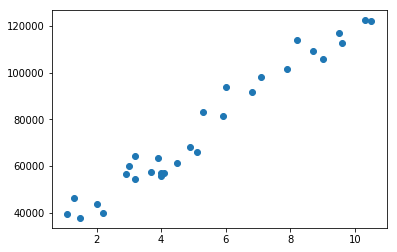

In [3]:
plt.scatter(exp,salary);

## Linear Regression

In [4]:
expMatrix = np.transpose(np.matrix(data['Exp']))
# same as 
#expMatrix = data.iloc[:, :-1].values;
#row needs to same
trainX,testX,trainy,testy =train_test_split(expMatrix,salary,random_state=5);
reg = LinearRegression().fit(trainX,trainy);
print("Predict score : {}".format(reg.score(testX,testy)));

Predict score : 0.955664040532678


## Draw line

line equation y = 9337.140734816741x + 27048.91343091271


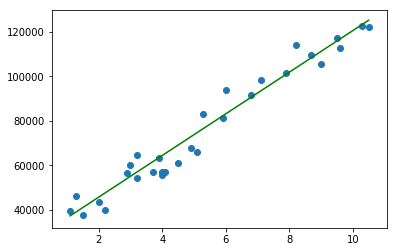

In [5]:
slope = reg.coef_[0];
intercept = reg.intercept_;

print("line equation y = {}x + {}".format(slope,intercept));

# for one feature y = mx + c
# for more than 1 feature (y = m1x1 + m2x2 + .... + c)
# general y = segma mixi + c

x = np.linspace(exp.min(),exp.max(),20);
y = slope * x + intercept;
plt.plot(x,y,color='green');
plt.scatter(exp,salary);

## Draw line using statistics formula

line equation y = 9449.962321455077x + 1.513678338140808


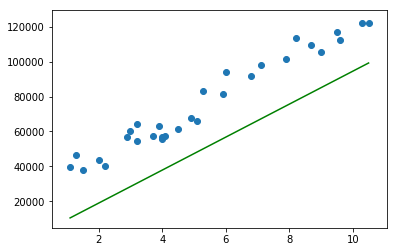

In [7]:
x = exp;
y = salary;
meanx = np.mean(x);
meany = np.mean(y);

# slope = sig(x-meanx)(y - meany)/ sig (x -meanx)2

numerator = 0;
denominator = 0;
for i in range(exp.size) :
    numerator += (x[i] - meanx) * (y[i] - meany);
    denominator += np.square(x[i] - meanx);
    
slope = numerator/denominator;
intercept = meany / (slope * meanx);
print("line equation y = {}x + {}".format(slope,intercept));

#Gradient search is used to adjust this line so that sqaure mean error is least

x = np.linspace(x.min(),x.max(),20);
y = slope * x + intercept;
plt.plot(x,y,color='green');
plt.scatter(exp,salary);